# Datenstrukturen und Algorithmen

## Praktische Aufgabe 2

In dieser praktischen Aufgabe werden Sie sich mit Dynamischen Programmieren, sowie einfachen Sortierverfahren beschäftigen.
Diese Aufgabe dient dazu die Konzepte aus der Vorlesung zu festigen und soll Ihnen dabei helfen ein Gefühl für die Funktionsweise der Sortieralgorithmen zu entwickeln. 

Die Abgaben werden mit der `nbgrader` Erweiterung korrigiert. Das System erwartet, dass der Code zum Lösen der Aufgaben nach der `#YOUR CODE HERE` Anweisung kommt. Außerdem darf die Zellenreihenfolge nicht geändert werden. Damit Sie selbst Ihre Lösungsvorschläge validieren können, werden Ihnen Unittests zur Verfügung gestellt. Beachten Sie, dass diese Tests keine Garantie sind für das Erreichen der vollen Punktzahl, da Sie nur einen Teil der Funktionalität überprüfen.

Wichtig: Füllen Sie auch die Zelle mit ihrem Abgabeteam vollständig aus. Bitte verändern Sie nicht den Namen der Datei, damit das System die Abgabe automatisch bewerten kann.

**Übersicht der Aufgaben** (20 Punkte):

1. **Dynamisches Programmieren** - insgesamt: 10 Punkte
   - Matrix-Multiplikation - 10P.

2. **Einfach Sortierverfahren** - insgesamt: 10 Punkte
   - Selection-Sort - 4P.
   - Insertion-Sort - 4P.
   - Vergleich von Operationen - 2P.


## Abgabeteam
Bitte füllen Sie die untenstehende Zelle aus mit 

Nummer des Tutoriums,

Voranme Nachname Matrikelnummer 1,

Vorname Nachname Matrikelnummer 2,

(Vorname Nachname Matrikelnummer 3)

Tutorium Musterlösung

Max Mustermann 123456

Erika Mustermann 123457

(Paul Mustermann 123458)

## Module importieren
Zuerst werden die benötigten Module importiert. Sie dürfen keine weiteren Module impotieren.

Wenn in Ihrer Entwickungsumbegung (z.B Deepnote) bestimmte Module nicht verfügbar sind, dann kommentieren Sie die erste Zeile aus um die Module temporär in der Umgebung zu installieren. 

In [1]:
#!pip install pandas, rwth_nb, nose

# unittests
from nose.tools import assert_equal

# measuring time
from time import time

# random numbers
from random import randint

# plotting
import pandas as pd
import rwth_nb.plots.mpl_decorations as rwth_plt

# Dynamisches Programmieren

Im Folgenden sollen Sie den in der Vorlesung vorgestellten Code modifizieren, um nicht nur die minimale Anzahl an Skalarmultiplikationen auszurechnen, sondern auch die korrekte Klammerung auszugeben.

## a) matrix_multiplication() - 10P.

Erweitern Sie den in der Vorlesung vorgestellten Code um eine Matrix `S`, in der Sie zusätzliche speichern, welche Kombination der Teillösungen Sie in jeder Teillösung ausgewählt haben. Diese Matrix soll für jede Teillösung die Klammerung der Matritzen mit ihren Namen speichern, die zu einer minimalen Anzahl an Skalarmultiplikationen führt.

Bitte beachten Sie zusätzlich, dass Sie jetzt nicht einen Vektor `r` als Eingabe bekommen, sondern ein Dictionary `R` in dem der Name, sowie die Dimension der Matrix als Key und Value angegeben werden. Initialisieren Sie zunächst den Vektor `r`, sowie die Matritzen `M` und `S` mit der richtigen Werten, bevor Sie mit der Berechnung beginnen. Die Matritzen in `R` sollen der Reihe nach miteinander multipliziert werden. Die Matrix `S` soll die Namen der Matritzen, sowie deren korrekte Klammerung beinhalten. Geben Sie am Ende der Berechnung sowohl die Matrix `M`, als auch `S` aus.

Die folgende Abbildung zeigt das Verhalten der Funktion _matrix_multiplication()_ an einem Beispiel:
```
Eingabe:
R = {'A': (10, 1), 'B': (1, 10), 'C': (10, 1)}

Ausgabe:
M = [[0, 100, 20], [None, 0, 10], [None, None, 0]]
S = [['A', '(AB)', '(A(BC))'], [None, 'B', '(BC)'], [None, None, 'C']]


Eingabe:
R = {'A': (30, 1), 'B': (1, 40), 'C': (40, 10), 'D': (10, 25)}

Ausgabe:
M = [[0, 1200, 700, 1400], [None, 0, 400, 650], [None, None, 0, 10000], [None, None, None, 0]]
S = [['A', '(AB)', '(A(BC))', '(A((BC)D))'], [None, 'B', '(BC)', '((BC)D)'], [None, None, 'C', '(CD)'], [None, None, None, 'D']]
```

Sie dürfen/sollen in dieser Aufgabe die Listen benutzen die von Python zur Verfügung gestellt werden.

In [2]:
def matrix_multiplication(R):
    n = len(R)    
    M = [x[:] for x in n * [n * [None]]]
    S = [x[:] for x in n * [n * [None]]]

    ### BEGIN SOLUTION
    r = [x[0] for x in R.values()] + [list(R.values())[-1][1]]
    for i in range(n):
        M[i][i] = 0
        S[i][i] = list(R)[i]

    for k in range(1, n):
        for i in range(n - k):
            val = float('inf')
            mat = None
            for j in range(i, i + k):
                new_val = M[i][j] + M[j + 1][i + k] + r[i] * r[j + 1] * r[i + k + 1]
                if new_val < val: 
                    val = new_val
                    mat = '(' + S[i][j] + S[j + 1][i + k] + ')'

            M[i][i + k] = val
            S[i][i + k] = mat
    ### END SOLUTION

    return M, S

In [3]:
#general case
#test1
R = {
    "A": (10, 1),
    "B": (1, 10),
    "C": (10, 1),
}
M, S = matrix_multiplication(R)
M_groundtruth = [[0, 100, 20], [None, 0, 10], [None, None, 0]]
S_groundtruth = [['A', '(AB)', '(A(BC))'], [None, 'B', '(BC)'], [None, None, 'C']]
assert_equal(str(M), str(M_groundtruth))
assert_equal(str(S), str(S_groundtruth))


#test2
R = {
    "A": (20, 5),
    "B": (5, 70),
    "C": (70, 5),
    "D": (5, 5),
}
M, S = matrix_multiplication(R)
M_groundtruth = [[0, 7000, 2250, 2375], [None, 0, 1750, 1875], [None, None, 0, 1750], [None, None, None, 0]]
S_groundtruth = [['A', '(AB)', '(A(BC))', '(A((BC)D))'], [None, 'B', '(BC)', '((BC)D)'], [None, None, 'C', '(CD)'], [None, None, None, 'D']]
assert_equal(str(M), str(M_groundtruth))
assert_equal(str(S), str(S_groundtruth))

### BEGIN HIDDEN TESTS
#basecase
R = {
    "A": (20, 5),
    "B": (5, 70)
}
M, S = matrix_multiplication(R)
M_groundtruth = [[0, 7000], [None, 0]]
S_groundtruth = [['A', '(AB)'], [None, 'B']]
assert_equal(str(M), str(M_groundtruth))
assert_equal(str(S), str(S_groundtruth))

### END HIDDEN TESTS

# Einfache Sortierverfahren

Der folgende Code implementiert das Bubble-Sort Verfahren in der Methode _`bubble_sort()`_. Beachten Sie, dass als Datenstruktur die vorimplementierten Listen von Python verwendet werden. Zusätzlich werden die Zahlen nicht aufsteigend, sondern absteigend sortiert.

Ihre Aufgabe ist es zwei weitere Sortierverfahren, Insertion-Sort und Selection-Sort, zu implementieren. Dies soll in den jeweiligen Methode  _`insertion_sort()`_ und _`selection_sort()`_ passieren. Anschließend sollen die Algorithmen bezüglich ihrer Laufzeit, sowie der Anzahl an Vergleichs- und Kopieroperationen verglichen werden.

Beachten Sie, dass die Methoden die übergebenen Listen direkt modifizieren sollen, weshalb die sortierte Liste nicht zurückgegeben werden muss.

Die zwei Variablen `cmp_ops` und `cpy_ops` werden benutzt um die Anzahl von Vergleichs- und Kopieroperationen innerhalb eines Aufrufs zu zählen. Vergleiche von Indizes werden in der folgenden Analyse vernachlässigt. Die Werte für die Operationen werden nach dem Sortieren zurückgegeben und können für die Auswertung im letzten Aufgabenteil genutzt werden.

In [4]:
def bubble_sort(a):
    cmp_ops = 0  # number of compare operations
    cpy_ops = 0  # number of copy operations

    i = 0
    n = len(a)
    while i < n - 1:
        j = n - 1
        while j > i:
            cmp_ops += 1
            if a[j] > a[j - 1]:
                cpy_ops += 2
                a[j], a[j - 1] = a[j - 1], a[j]
            j -= 1
        i += 1

    return cmp_ops, cpy_ops

In [5]:
a = [randint(0, 10) for _ in range(10)]
print(f"Unsortierte Liste:\n{a}")

cmp, cpy = bubble_sort(a)
print(f"Sortierte Liste:\n{a}")
print(f"Vergleichs- & Kopieroperationen:\n{cmp}, {cpy}")

Unsortierte Liste:
[10, 1, 1, 5, 8, 0, 6, 0, 3, 4]
Sortierte Liste:
[10, 8, 6, 5, 4, 3, 1, 1, 0, 0]
Vergleichs- & Kopieroperationen:
45, 36


Implementieren Sie die Functionen _`insertion_sort()`_ und _`insertion_sort()`_ in den unten stehenden Zellen.

## a) _selection_sort()_ - 4P.

Die Function _selection_sort()_ soll den Selection-Sort Algorithmus aus der Vorlesung implementieren. Die Funktion erwartet eine beliebige Liste als Eingabe, welche dann sortiert werden soll. Die Liste soll absteigend sortiert werden. Zusätzlich sollen die Anzahl der Vergleichs- und Kopieroperationen gezählt werden und am Ende der Funktion zurückgeben. 

Orientieren Sie sich bei Ihrer Implementierung an dem Pseudocode, der in der Vorlesung vorgestellt worden ist, sowie an der Funktion _bubble_sort()_. Bitte beachten Sie, dass es insbesondere nicht erlaubt ist die Liste zuerst aufsteigend zu sortieren und in einem zweiten Schritt die Reihenfolge der Zahlen zu ändern. Ihr Algorithmus soll direkt beim Durchlauf die Zahlen absteigend sortieren. Sie dürfen die vordefinierten Listen von Python benutzen, zusätzlich dürfen Sie die Funktion len() verwenden. Alle anderen Funktionen dürfen Sie nicht benutzen, so auch nicht die Funktion sort() oder reverse(). 

In [6]:
def selection_sort(a):
    cmp_ops = 0  # number of compare operations
    cpy_ops = 0  # number of copy operations

    ### BEGIN SOLUTION HERE
    i = 0
    n = len(a)
    while i < n - 1:
        max = i
        j = i + 1
        while j < n:
            cmp_ops += 1
            if a[j] > a[max]:
                max = j
            j += 1
        cpy_ops += 2
        a[i], a[max] = a[max], a[i]
        i += 1

    ### END SOLUTION HERE
    return cmp_ops, cpy_ops

## a) - Test Cases

In [7]:
# public unittests
# test if list is sorted after function call
l_unsorted = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
l_sorted = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
selection_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))

l_unsorted = ['asd', 'qwe', 'fgh', 'iop']
l_sorted = ['qwe', 'iop', 'fgh', 'asd']
selection_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))


#check yourself if the list is ordered in a descending order
a = [randint(0, 10) for _ in range(10)]
print(f"Unsortierte Liste:\n{a}")

cmp, cpy = selection_sort(a)
print(f"Sortierte Liste:\n{a}")
print(f"Vergleichs- & Kopieroperationen:\n{cmp}, {cpy}")

### BEGIN HIDDEN TESTS
#edgecases: empty list
l_unsorted = []
l_sorted = []
selection_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))

#list with one element
l_unsorted = ['42']
l_sorted = ['42']
selection_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))

#general test with duplicates
l_unsorted = [0, 1, 4, 2, 7, 8, 2, 3, 4, 5, 6, 7, 8, 9]
l_sorted = [9, 8, 8, 7, 7, 6, 5, 4, 4, 3, 2, 2, 1, 0]
selection_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))
### END HIDDEN TESTS

Unsortierte Liste:
[7, 4, 8, 6, 6, 10, 4, 0, 3, 1]
Sortierte Liste:
[10, 8, 7, 6, 6, 4, 4, 3, 1, 0]
Vergleichs- & Kopieroperationen:
45, 18


## b) _insertion_sort()_ - 4P.

Die Function _insertion_sort()_ soll den Insertion-Sort Algorithmus aus der Vorlesung implementieren, allerdings soll die Liste absteigend sortiert werden. Sie bekommen eine sortierte oder unsortierte Liste als Eingabe und sollen diese sortieren. Zusätzlich sollen Sie die Anzahl der Vergleichs- und Kopieroperationen in ihrem Algorithmus zählen und am Ende der Funktion zurückgeben. 

Bitte orientieren Sie sich in Ihrer Implementierung an dem Pseudocode, der in der Vorlesung vorgestellt worden ist, sowie an der Funktion _bubble_sort()_. Bitte beachten Sie zusätzlich, dass es insbesondere nicht erlaubt ist die Liste zuerst aufsteigend zu sortieren und in einem zweiten Schritt die Reihenfolge der Zahlen zu ändern. Ihr Algorithmus soll direkt beim Durchlauf die Zahlen absteigend einsortieren. Sie dürfen die vordefinierten Listen von Python benutzen, zusätzlich dürfen Sie die Funktion len() verwenden. Alle anderen Funktionen dürfen Sie nicht benutzen, so auch nicht die Funktion sort() oder reverse().

In [8]:
def insertion_sort(a):
    cmp_ops = 0  # number of compare operations
    cpy_ops = 0  # number of copy operations

    ### BEGIN SOLUTION
    i = 1
    n = len(a)
    while i < n:
        cpy_ops += 1
        h = a[i]
        j = i
        cmp_ops += 1
        while j > 0 and a[j - 1] < h:
            cmp_ops += 1
            cpy_ops += 1
            a[j] = a[j - 1]
            j -= 1
        cpy_ops += 1
        a[j] = h
        i += 1

    ### END SOLUTION
    return cmp_ops, cpy_ops

## b) - Test Cases

In [9]:
# public unittests
# test if list is sorted after function call
l_unsorted = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
l_sorted = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
insertion_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))

l_unsorted = ['asd', 'qwe', 'fgh', 'iop']
l_sorted = ['qwe', 'iop', 'fgh', 'asd']
insertion_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))


#check yourself if the list is ordered in a descending order
a = [randint(0, 10) for _ in range(10)]
print(f"Unsortierte Liste:\n{a}")

cmp, cpy = insertion_sort(a)
print(f"Sortierte Liste:\n{a}")
print(f"Vergleichs- & Kopieroperationen:\n{cmp}, {cpy}")

### BEGIN HIDDEN TESTS
#edgecases: empty list
l_unsorted = []
l_sorted = []
insertion_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))

#list with one element
l_unsorted = ['42']
l_sorted = ['42']
insertion_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))

#general test with duplicates
l_unsorted = [0, 1, 4, 2, 7, 8, 2, 3, 4, 5, 6, 7, 8, 9]
l_sorted = [9, 8, 8, 7, 7, 6, 5, 4, 4, 3, 2, 2, 1, 0]
insertion_sort(l_unsorted)
assert_equal(str(l_unsorted), str(l_sorted))
### END HIDDEN TESTS

Unsortierte Liste:
[7, 3, 10, 9, 5, 9, 7, 7, 9, 6]
Sortierte Liste:
[10, 9, 9, 9, 7, 7, 7, 6, 5, 3]
Vergleichs- & Kopieroperationen:
28, 37


## c) Vergleich von Operationen - 2P.

Als nächstes sollen Sie die in diesem Notebook implementierten Verfahren gegeneinander testen. Der unten stehende Code führt die Sortierverfahren auf zwei generierten Listen und berechnet zusätzlich die Ausführungszeit. Diese Zeit ist abhängig von der verwendeten Hardware und kann auf unterschiedlichen Umgebungen variieren. Die Anzahl der Vergleichs- und Kopieroperationen bleibt allerdings gleich.

Führen Sie den unten stehenden Code aus und beschreiben sie kurz (3-5 Sätze) die Ergebnisse, die Sie in den Tabellen sehen. Verhalten sich die Sortieralgorithmen so, wie in der Vorlesung beschrieben? Worin besteht Ihrer Meinung nach der unterschied zwischen `Array 1` und `Array 2`? Können Sie diese Ergebnisse bei mehrfacher Ausführung von dem Code reproduzieren oder ändern sich die Ergebnisse jedes Mal?

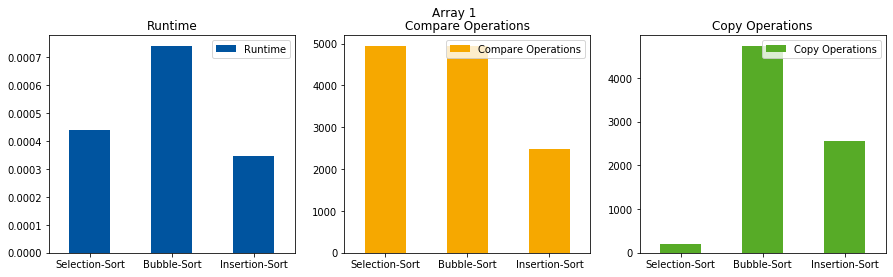

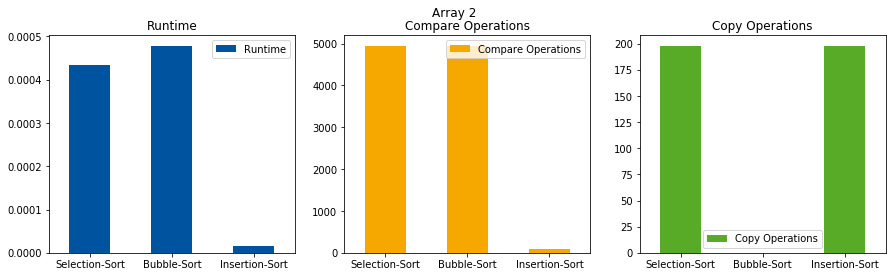

In [10]:
def testSort(a, sort_fct):
    b = [x for x in a]
    start = time()
    cmp_ops, cpy_ops = sort_fct(b)
    return time() - start, cmp_ops, cpy_ops

def plotRuntimeAndOperations(array, title=None):
    df = pd.DataFrame(columns=['Runtime', 'Compare Operations', 'Copy Operations'])
    df.loc['Selection-Sort'] = testSort(array, selection_sort)
    df.loc['Bubble-Sort'] = testSort(array, bubble_sort)
    df.loc['Insertion-Sort'] = testSort(array, insertion_sort)
    ax = df.plot.bar(title=title, rot=0, subplots=True, layout=(1,3), figsize=(15,4))

array_1 = [randint(0, 100) for _ in range(100)]
array_2 = list(range(100, 0, -1))

plotRuntimeAndOperations(array_1, "Array 1")
plotRuntimeAndOperations(array_2, "Array 2")

### BEGIN SOLUTION

- **Array 1 hat die Average-Case an Vergleichs- und Kopieroperationen und Array 2 den Best-Case** oder eine sinnvolle Kombination aus:  
  - Selection- & Bubble-Sort brauchen für Array 1 und Array 2 die gleiche Anzahl von Vergleichsoperationen
  - Selection-Sort braucht auf Array 1 und Array 2 die gleiche Anzahl an Kopieroperationen
  - Bubble-Sort benötigt keine Kopieroperationen auf Array 2
  - ...
- **Array 1 besteht aus einer zufälligen Liste und Array 2 aus einer sortierten Liste**
- Die Laufzeit von Array 1 ist größer, als die Laufzeit von Array 2, wobei die Laufzeit von Array 1 variiert und die von Array 2 konstant bleibt.

### END SOLUTION

## Jupyter Notebook Stolperfalle
Bei der Benutzung von Jupyter Notebooks, wird der globale Zustand aller Variablen zwischen der Ausführung von verschiedenen Zellen erhalten. Dies ist auch der Fall, wenn man Zellen löscht oder hinzufügt.
Um sicher zu gehen, dass Sie nicht ausversehen notwendige Variablen überschrieben oder gelöscht haben benutzen Sie bitte `Kernel -> Restart & Run All`.

Zudem möchten wir Sie bitten zu überprüfen, ob alle öffentlichen Unittests bestanden werden. Dies stellt sicher, dass wir ihren Code mit unserem automatisierten System bewerten können.